##    1.  FIRST ANALYSIS : UNDERSTANDING THE DATA 

### 1.1 Finding out in which year has the most number of films
### 1.2 Visualizing IMDb over the years
### 1.3 Analysing the gross trend over the years  
### 1.4 REVENUE PLOT 
### 1.5  3-d plot for IMDB vs Budget vs Gross<
### 1.6 Q. Is budget directly related to profit? 
### 1.7  WITH WHICH FACTOS IS PROFIT ACTUALLY RELATED IN THE DATASET? 
### 1.8 Which country has the highest number of movies?
### 1.9 Which language has the highest number of movies ?

In [1]:
#importing required libraries

In [2]:
import os                            #importng os library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame
import numpy as np
import matplotlib
from matplotlib_venn import venn2, venn2_circles
from matplotlib_venn import venn3, venn3_circles
%matplotlib inline

In [3]:

path=os.chdir("..")                   #Moving back one folder


In [4]:
path=os.getcwd()                          #Checking the path
path

'C:\\DataAnalysis4Python\\kanakia_dhruv_spring2017\\Final'

In [5]:
final_path= path+"\\Data\\movie_metadata.csv" #setting up the final path in final_path

In [6]:
df= pd.read_csv(final_path)
#df.head()

In [7]:
df1=df.dropna()                         #dropping all the NA values
#df1.head()

## 1. Finding out in which year range the number of films in the dataset is the most

In [8]:
df_year=df1.groupby('title_year')['movie_title'].count()  #grouping by title_year to count year of movies in each year

In [9]:
df_year_count= df_year.to_frame().reset_index()

In [10]:
#df_year_count.head()

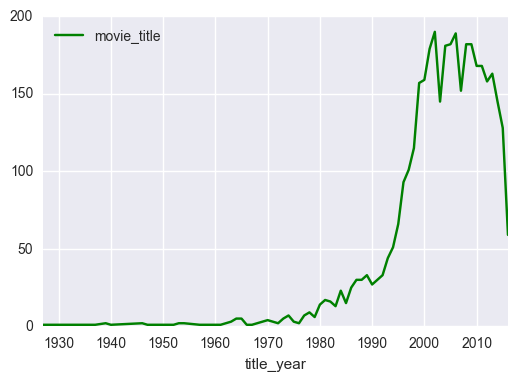

In [11]:
df_year_count.plot(x='title_year',y='movie_title',kind='line', color='green')

## CONCLUSION:The dataset has the highest number of films between the year 2000-2010


## 1.2 Visualizing IMDb over the years.

In [12]:
df_imdb_year=df1.groupby('title_year' ,as_index=False)['imdb_score'].mean()

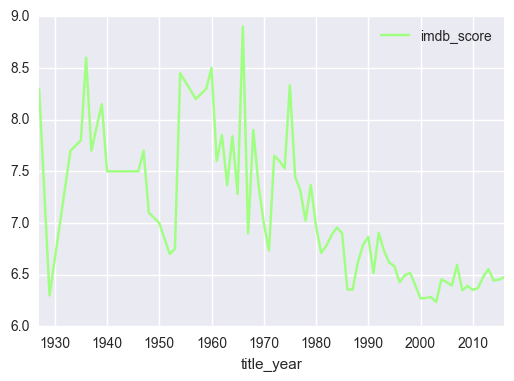

In [13]:
df_imdb_year.plot(x='title_year', y='imdb_score', kind='line', color='#9fff80')

## It has no direct pattern but we can surely see that increase in number of films has decreased the quality and can that with increase in Quantity, Quality has decreased 

## 1.3 Visualizing the trend of GROSS over the YEAR's

In [14]:
df_movies_year_gross = df1.groupby(['title_year'], as_index=False)['gross'].sum()
#df_movies_year_gross.head()

In [15]:
df_year_count= df_year_count.merge(df_movies_year_gross)

In [16]:
#df_year_count.head()

In [17]:
df_year_count[['title_year','gross']] = df_year_count[['title_year','gross']].apply(pd.to_numeric)

In [18]:
# df_year_count.head()

In [19]:
df_year_count['Average']= df_year_count['gross']/df_year_count['movie_title'] 

In [20]:
df_year_count= df_year_count[(df_year_count.title_year> 1980)]

In [21]:
# df_year_count.head()

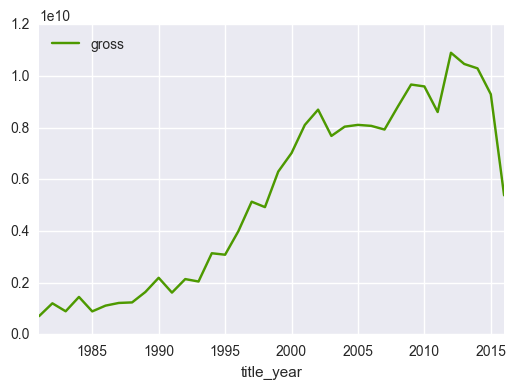

In [22]:
df_year_count.plot(x='title_year', y='gross', kind='line', color='#4d9900' )

## Gross increased over the years but is declining in the current years 

## 1.4 REVENUE PLOT

In [23]:
df_movies_year_budget = df1.groupby(['title_year'], as_index=False)['budget'].sum()
# df_movies_year_budget.head()


In [24]:
df_year_count_budget= df_year_count.merge(df_movies_year_budget)

In [25]:
df_year_count_budget.head()

title_year  movie_title         gross       Average       budget
0      1981.0           17  7.048333e+08  4.146078e+07  182150000.0
1      1982.0           16  1.200601e+09  7.503755e+07  251400000.0
2      1983.0           13  8.922934e+08  6.863795e+07  255000000.0
3      1984.0           23  1.447611e+09  6.293960e+07  354300000.0
4      1985.0           15  8.883470e+08  5.922313e+07  246605523.0

In [26]:
df_year_count_budget[['title_year','budget']] = df_year_count_budget[['title_year','budget']].apply(pd.to_numeric)

In [27]:
df_year_count_budget['Average_Budget']= df_year_count_budget['budget']/df_year_count['movie_title'] 

In [28]:
df_year_count_budget= df_year_count_budget[(df_year_count_budget.title_year> 1980)]

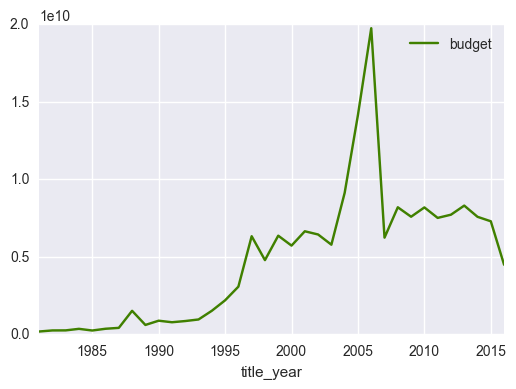

In [29]:
df_year_count_budget.plot(x='title_year', y='budget', kind='line', color='#408000')

## Can see there is a pattern between the three plots i.e IMDB_Score vs Budget vs Gross pver the years. To get a better idea we will plot a 3-d interactive plot

## 1.5  3-d plot for IMDB vs Budget vs Gross

In [30]:
%matplotlib notebook

In [31]:
%matplotlib notebook

<IPython.core.display.Javascript object>


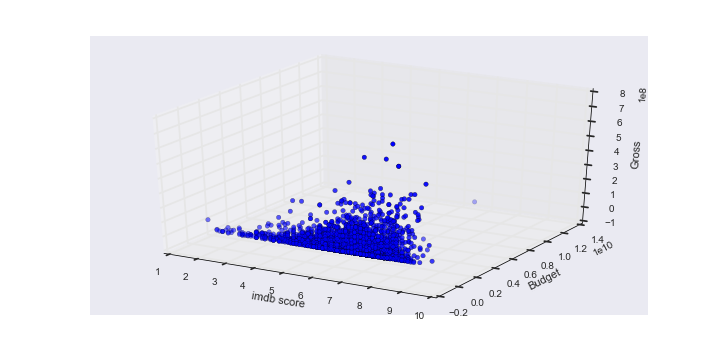

In [32]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(10,5)).gca(projection='3d')
#ax = fig.add_subplot(111, projection='3d')
x =df1['imdb_score']
y =df1['budget']
z =df1['gross']



fig.scatter(x, y, z)

fig.set_xlabel('imdb score')
fig.set_ylabel('Budget')
fig.set_zlabel('Gross')

plt.show()

## The above plot clearly indicates that imdb and gross(revenue) are directly related. With increase in gross the IMDb increases

In [33]:
%matplotlib inline

## 1.6 Q. Is budget directly related to profit? 

In [34]:
df2 = df[np.isfinite(df['budget'])]

In [35]:
df2=df2[np.isfinite(df2['gross'])]

In [36]:
df2['net']= df2['gross']-df2['budget']
#df_2006['Net']= df_2006['gross']-df_2006['budget']
df2['net_percentage']= df2['net']/df2['budget']
df2['net_percentage']= df2['net_percentage']*100

In [37]:
# df2.head()

In [38]:
%matplotlib inline

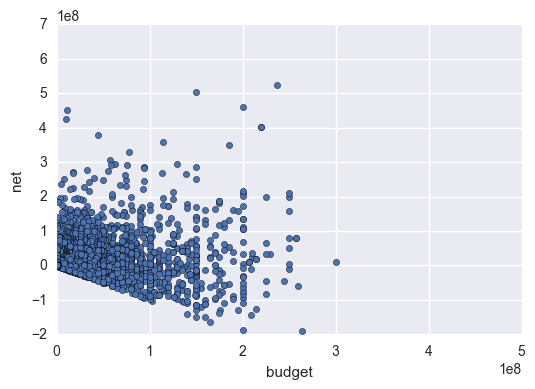

In [39]:
df2.plot(x='budget',y='net',kind='scatter', xlim=(0000000000,500000000), ylim=(-200000000,700000000))

In [41]:
df_budget_net=( df2[['net','budget']].corr())
df_budget_net

net    budget
net     1.000000 -0.951709
budget -0.951709  1.000000

###  CONCLUSION
### 1. FROM the above graph you can clearly see that's not the case. YES, there are instances when net profit has reached    highest point for few high budget movies. But, the general trend shows that it mostly decreases with increase in budget
###  2. Even the Coorelation proves that net and budget are nit directly related  


## 1.7  WITH WHICH FACTOS IS PROFIT ACTUALLY RELATED IN THE DATASET?

In [87]:
corr = df2.corr()

In [54]:
df_budget_profit=( df2.corr())
df_budget_profit

num_critic_for_reviews  duration  \
num_critic_for_reviews                   1.000000  0.239282   
duration                                 0.239282  1.000000   
director_facebook_likes                  0.179252  0.180797   
actor_3_facebook_likes                   0.256934  0.127678   
actor_1_facebook_likes                   0.172216  0.087185   
gross                                    0.477022  0.252781   
num_voted_users                          0.600473  0.344151   
cast_total_facebook_likes                0.243990  0.124478   
facenumber_in_poster                    -0.033828  0.032307   
num_user_for_reviews                     0.573610  0.356218   
budget                                   0.107666  0.069574   
title_year                               0.392422 -0.128198   
actor_2_facebook_likes                   0.258969  0.131826   
imdb_score                               0.340219  0.358253   
aspect_ratio                             0.181808  0.154932   
movie_facebook_likes                     0.703414  0.221718   
net                                      0.041345  0.009599   
net_percentage                           0.033150 -0.032498   

                           director_facebook_likes  actor_3_facebook_likes  \
num_critic_for_reviews                    0.179252                0.256934   
duration                                  0.180797                0.127678   
director_facebook_likes                   1.000000                0.119413   
actor_3_facebook_likes                    0.119413                1.000000   
actor_1_facebook_likes                    0.091590                0.253884   
gross                                     0.142158                0.303080   
num_voted_users                           0.301847                0.271188   
cast_total_facebook_likes                 0.121031                0.490246   
facenumber_in_poster                     -0.047202                0.104290   
num_user_for_reviews                      0.220459                0.209776   
budget                                    0.019235                0.041219   
title_year                               -0.045781                0.112255   
actor_2_facebook_likes                    0.118357                0.554580   
imdb_score                                0.189293                0.064991   
aspect_ratio                              0.038173                0.047161   
movie_facebook_likes                      0.162555                0.271943   
net                                       0.024960                0.052960   
net_percentage                           -0.006292               -0.012182   

                           actor_1_facebook_likes     gross  num_voted_users  \
num_critic_for_reviews                   0.172216  0.477022         0.600473   
duration                                 0.087185  0.252781         0.344151   
director_facebook_likes                  0.091590  0.142158         0.301847   
actor_3_facebook_likes                   0.253884  0.303080         0.271188   
actor_1_facebook_likes                   1.000000  0.148880         0.183599   
gross                                    0.148880  1.000000         0.631404   
num_voted_users                          0.183599  0.631404         1.000000   
cast_total_facebook_likes                0.945227  0.240982         0.254050   
facenumber_in_poster                     0.064623 -0.030618        -0.031936   
num_user_for_reviews                     0.127462  0.552499         0.782493   
budget                                   0.017544  0.102179         0.068834   
title_year                               0.091297  0.046575         0.016773   
actor_2_facebook_likes                   0.392058  0.256579         0.248970   
imdb_score                               0.091960  0.211525         0.473209   
aspect_ratio                             0.058401  0.066456         0.086580   
movie_facebook_likes                     0.131591  0.375455       

##  Conclusion: Net and Net percentage does not have any direct relation with any of the other element

## 1.8 Which country has the highest number of movies?

In [44]:
df_num_movies_country= df1.groupby(['country'])['movie_title'].count().reset_index()

In [45]:
df_num_movies_country.head()

country  movie_title
0  Afghanistan            1
1    Argentina            3
2        Aruba            1
3    Australia           39
4      Belgium            1

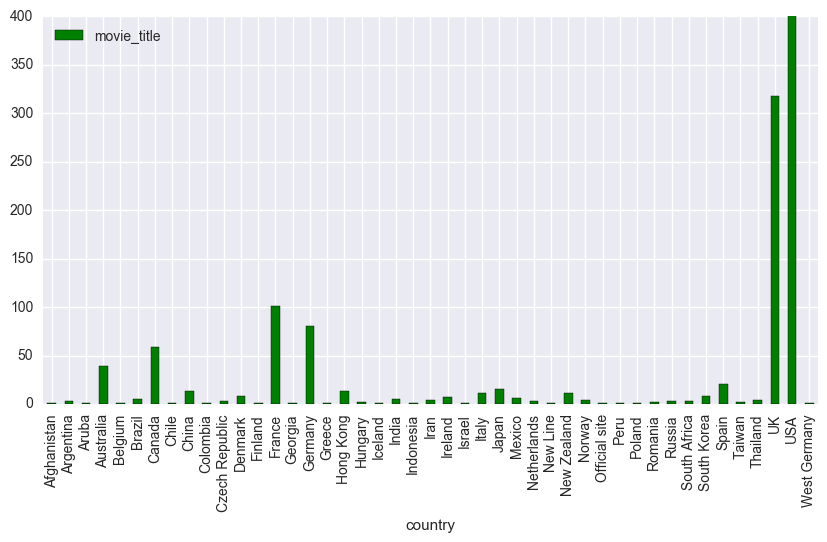

In [46]:
df_num_movies_country.plot(x='country',y ='movie_title', kind='bar', ylim=(0,400), figsize=(10,5), color='green')

## USA leads with the most number of films in the dataset. The big 5 are USA, UK, Germany, France and Canada. We will now figure out which language is the most used in the database

## 1.10 Which language has the highest number of movies ? 

In [47]:
df_num_lan= df1.groupby(['language'])['movie_title'].count().reset_index()

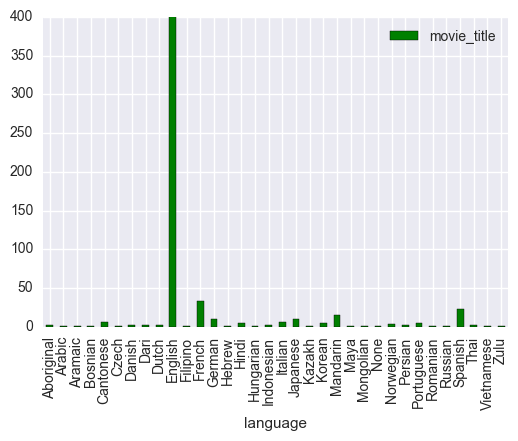

In [48]:
df_num_lan.plot(x='language',y='movie_title', kind='bar', ylim=(0,400), color='green')

## ENglish is the highest use language in the dataset followed by French, Spanish, Mandarian and Japanese